In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #그래프
import seaborn as sns #좀더 섬세한 그래프 작업
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5) #시본으로 작업시 맞출 폰트, 사이즈, 배경


In [2]:
df = pd.read_csv("Combined_2016.csv")
df

,Continent,Country,Demox_eiu,Income_per_person,Invest_%_gdp,Tax_%_gdp,Gini_index,Happiness_Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Africa,Angola,34.0,6260,8.4,10.3,42.6,141,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
1,Africa,Botswana,78.7,16000,24.3,20.8,60.5,137,3.974,3.875,4.073,1.09426,0.89186,0.34752,0.44089,0.10769,0.12425,0.96741
2,Africa,Burkina Faso,47.0,1640,23.2,15.8,35.3,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319
3,Africa,Cote d'Ivoire,38.1,3400,20.7,15.2,41.5,0,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,Africa,Kenya,53.3,2890,17.3,15.8,41.1,122,4.356,4.259,4.453,0.52267,0.76240,0.30147,0.40576,0.06686,0.41328,1.88326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Europe,Turkey,50.4,23700,28.2,18.3,41.9,78,5.389,5.295,5.483,1.16492,0.87717,0.64718,0.23889,0.12348,0.04707,2.29074
93,Europe,Ukraine,57.0,7680,21.5,19.6,24.9,123,4.324,4.236,4.412,0.87287,1.01413,0.58628,0.12859,0.01829,0.20363,1.50066
94,Europe,United Kingdom,83.6,39400,17.0,25.6,33.4,23,6.725,6.647,6.803,1.40283,1.08672,0.80991,0.50036,0.27399,0.50156,2.14999
95,Oceania,Australia,90.1,44600,25.3,22.3,32.3,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553


In [3]:
df.describe()

,Demox_eiu,Income_per_person,Invest_%_gdp,Tax_%_gdp,Gini_index,Happiness_Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,65.411340,22482.989691,23.389691,17.277768,37.323711,63.134021,5.481289,5.393804,5.568773,1.024244,0.859580,0.606980,0.394391,0.136693,0.250431,2.208970
std,18.515893,19144.910451,6.539758,6.796743,8.413553,45.359129,1.584371,1.577629,1.591688,0.413356,0.282632,0.232777,0.155403,0.123626,0.154833,0.712472
min,19.500000,1140.000000,8.400000,0.043500,24.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.300000,7370.000000,19.600000,13.300000,31.600000,22.000000,4.655000,4.560000,4.774000,0.847310,0.728030,0.501630,0.310560,0.047620,0.138370,1.928160
50%,66.700000,16800.000000,22.900000,16.300000,35.600000,57.000000,5.743000,5.647000,5.839000,1.115080,0.931640,0.647380,0.422840,0.103980,0.225530,2.281360
75%,78.800000,33400.000000,25.900000,22.000000,42.000000,101.000000,6.596000,6.515000,6.677000,1.337660,1.052490,0.800290,0.521680,0.183550,0.345390,2.613550
max,99.300000,93900.000000,55.600000,38.500000,63.000000,155.000000,7.526000,7.460000,7.669000,1.697520,1.183260,0.947190,0.608480,0.505210,0.819710,3.559060


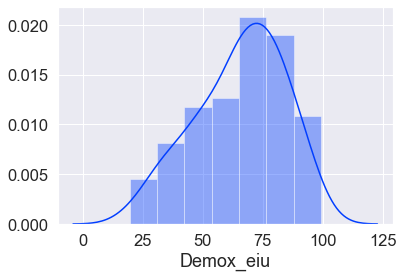

In [5]:
sns.distplot(df['Demox_eiu'])

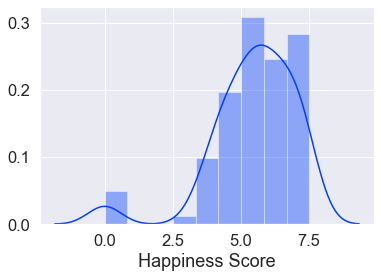

In [6]:
sns.distplot(df['Happiness Score'])

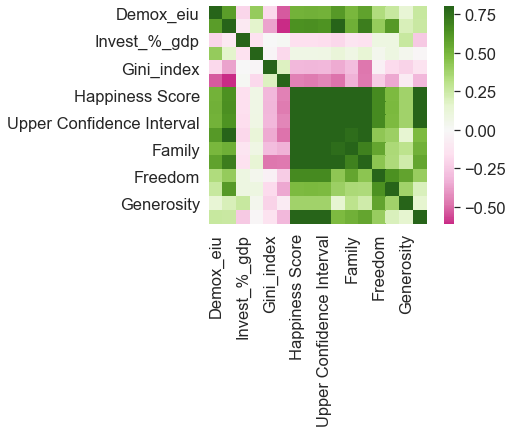

In [12]:
corrmat = df.corr()
sns.color_palette("Paired")
sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0)

In [14]:
data = dict(type = 'choropleth',locations= df['Country'], locationmode='country names', z=df['Happiness_Rank'],
            text=df['Country'],colorbar={'title':'Happiness'})
layout = dict(title = 'Global Happiness 2019', geo= dict(showframe = False))
choromap3 =go.Figure(data=[data], layout=layout)
iplot(choromap3)

In [15]:
data = dict(type = 'choropleth',locations= df['Country'], locationmode='country names', z=df['Demox_eiu'],
            text=df['Country'],colorbar={'title':'Happiness'})
layout = dict(title = 'Global Happiness 2019', geo= dict(showframe = False))
choromap3 =go.Figure(data=[data], layout=layout)
iplot(choromap3)

In [18]:
data = dict(type = 'choropleth',locations= df['Country'], locationmode='country names', z=df['Income_per_person'],
            text=df['Country'],colorbar={'title':'Happiness'})
layout = dict(title = 'Global Happiness 2019', geo= dict(showframe = False))
choromap3 =go.Figure(data=[data], layout=layout)
iplot(choromap3)

In [17]:
data = dict(type = 'choropleth',locations= df['Country'], locationmode='country names', z=df['Tax_%_gdp'],
            text=df['Country'],colorbar={'title':'Happiness'})
layout = dict(title = 'Global Happiness 2019', geo= dict(showframe = False))
choromap3 =go.Figure(data=[data], layout=layout)
iplot(choromap3)

In [19]:
data = dict(type = 'choropleth',locations= df['Country'], locationmode='country names', z=df['Happiness Score'],
            text=df['Country'],colorbar={'title':'Happiness'})
layout = dict(title = 'Global Happiness 2019', geo= dict(showframe = False))
choromap3 =go.Figure(data=[data], layout=layout)
iplot(choromap3)

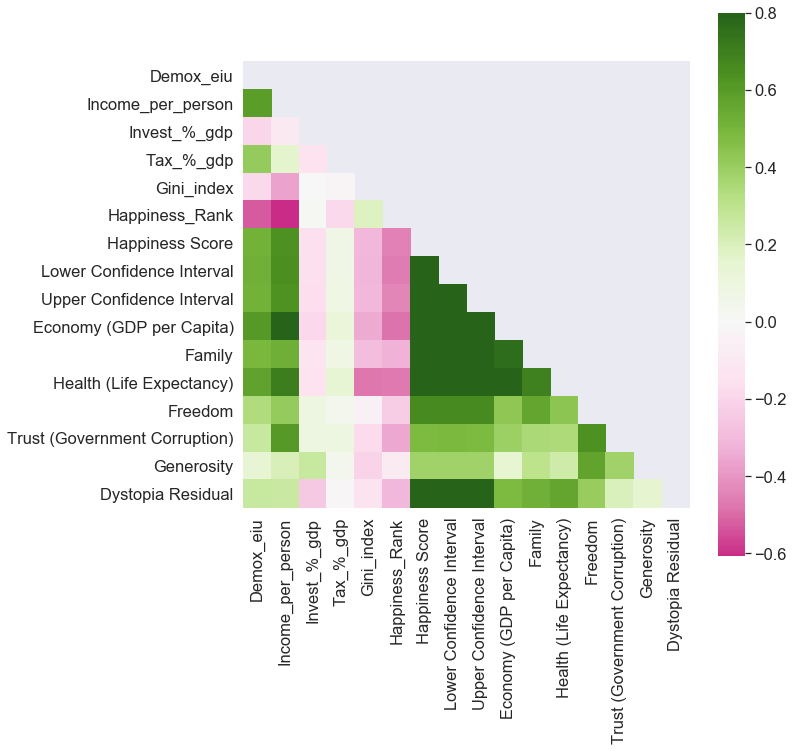

In [20]:
corrmat = df.corr()
mask= np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #np.triu_indice()는 행렬의 상단 삼각형을 반환시킴
plt.figure(figsize= (10,10))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0, mask = mask)

In [23]:
kcj_df = df[df['Country'].str.contains('Korea|United|Japan')]
kcj_df

,Continent,Country,Demox_eiu,Income_per_person,Invest_%_gdp,Tax_%_gdp,Gini_index,Happiness_Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
31,Americas,United States,79.8,53600,19.7,10.9000,41.4,13,7.104,7.020,7.188,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782
40,Asia,Japan,79.9,38100,23.6,11.1000,32.1,53,5.921,5.850,5.992,1.38007,1.06054,0.91491,0.46761,0.18985,0.10224,1.80584
52,Asia,South Korea,79.2,35000,29.3,14.8000,31.6,57,5.835,5.747,5.923,1.35948,0.72194,0.88645,0.25168,0.07716,0.18824,2.35015
55,Asia,United Arab Emirates,27.5,67000,26.0,0.0435,40.0,28,6.573,6.494,6.652,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507
94,Europe,United Kingdom,83.6,39400,17.0,25.6000,33.4,23,6.725,6.647,6.803,1.40283,1.08672,0.80991,0.50036,0.27399,0.50156,2.14999


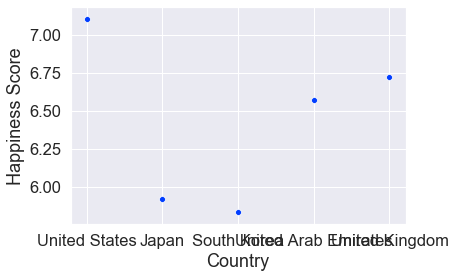

In [24]:
sns.scatterplot(x= 'Country', y= 'Happiness Score', data= kcj_df)